In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets, models,layers
from tensorflow import keras

In [3]:
(x_train,y_train), (x_test,y_test)=datasets.cifar10.load_data()

170508288/170498071 [==============================] - 8s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [17]:
y_train = y_train.reshape(-1,)

In [18]:
y_test = y_test.reshape(-1,)

In [14]:
classes= ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [19]:
def showimage(x,y,index):
    plt.figure(figsize=(2,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

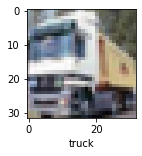

In [26]:
showimage(x_train,y_train,1)

In [25]:
x_train = x_train/255
x_test = x_test/255

In [29]:
model = keras.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation ='relu'),
    layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.8122 - accuracy: 0.3576
Epoch 2/5
1563/1563 [==============================] - 59s 38ms/step - loss: 1.6242 - accuracy: 0.4252
Epoch 3/5
1563/1563 [==============================] - 57s 36ms/step - loss: 1.5430 - accuracy: 0.4555
Epoch 4/5
1563/1563 [==============================] - 60s 38ms/step - loss: 1.4818 - accuracy: 0.4786
Epoch 5/5
1563/1563 [==============================] - 60s 38ms/step - loss: 1.4337 - accuracy: 0.4955


In [30]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 8ms/step - loss: 1.5141 - accuracy: 0.4566


[1.5140604972839355, 0.45660001039505005]

In [36]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred= model.predict(x_test)
y_pred = [np.argmax(y) for y in y_pred]
print(classification_report(y_test,y_pred))
#print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.43      0.73      0.54      1000
           1       0.58      0.63      0.60      1000
           2       0.46      0.20      0.28      1000
           3       0.39      0.18      0.25      1000
           4       0.49      0.32      0.39      1000
           5       0.31      0.53      0.40      1000
           6       0.63      0.39      0.48      1000
           7       0.36      0.77      0.49      1000
           8       0.63      0.55      0.58      1000
           9       0.73      0.26      0.39      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.44     10000
weighted avg       0.50      0.46      0.44     10000



In [39]:
cnn = keras.Sequential([
    layers.Conv2D(input_shape=(32,32,3),filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.4868 - accuracy: 0.4682
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1214 - accuracy: 0.6093
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0012 - accuracy: 0.65430s - loss:
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9146 - accuracy: 0.6826
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8557 - accuracy: 0.7051
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8061 - accuracy: 0.7206
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7647 - accuracy: 0.7356
Epoch 8/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7236 - accuracy: 0.74890s - loss: 0.7
Epoch 9/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6935 - accuracy: 0.7601
Epoch 10/10
1563/1563 [=================

In [40]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9319 - accuracy: 0.6924


[0.9319173097610474, 0.6923999786376953]

In [42]:
y_pred=cnn.predict(x_test)

In [44]:
y_pred= [np.argmax(y) for y in y_pred] 

In [45]:
y_pred[:5]

[3, 8, 1, 0, 6]

In [46]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred= cnn.predict(x_test)
y_pred = [np.argmax(y) for y in y_pred]
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72      1000
           1       0.77      0.85      0.81      1000
           2       0.65      0.52      0.58      1000
           3       0.48      0.57      0.52      1000
           4       0.62      0.62      0.62      1000
           5       0.64      0.58      0.61      1000
           6       0.70      0.82      0.76      1000
           7       0.74      0.73      0.73      1000
           8       0.82      0.76      0.79      1000
           9       0.77      0.76      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



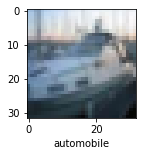

In [53]:
showimage(x_test,y_pred,2)